In [1]:
from portfolio import PortfolioGenerator
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import math

In [4]:
class SampleStrategy(PortfolioGenerator):

    def __init__(self):
        pass

    def build_signal(self, stock_features):
        return self.momentum(stock_features)

    def momentum(self, stock_features):
        return stock_features.groupby(['ticker'])['returns'].mean()


In [3]:
def read_stock_data():
        '''
        Description:
            Reads in simulated stock data from stock_data.csv
        Returns:
            stock_df (DataFrame): standardized ticker/factor data in pandas df
        Raises:
            AssertionError: ticker_data.csv/factor_data.csv has an invalid format
        '''
        ticker_df = pd.read_csv('stock_data/ticker_data.csv')
        factor_df = pd.read_csv('stock_data/factor_data.csv')
        assert 'timestep' in ticker_df.columns, "ticker_data.csv has an invalid format"
        assert 'ticker' in ticker_df.columns, "ticker_data.csv has an invalid format"
        assert 'returns' in ticker_df.columns, "ticker_data.csv has an invalid format"
        assert 'timestep' in factor_df.columns, "factor_data.csv has an invalid format"
        ticker_df.set_index('timestep', inplace=True)
        factor_df.set_index('timestep', inplace=True)
        stock_df = ticker_df.join(factor_df, how='left')
        return stock_df

In [31]:
from numpy import linalg as LA
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
factor_df = pd.read_csv('stock_data/factor_data.csv')

In [57]:
test = factor_df[1:50].drop('timestep', axis = 1)
test.head()

,VIX,COPP,3M_R,US_TRY,BIG_IX,SMALL_IX,SENTI,TEMP,RAIN,OIL
1,14.458574,98.095646,0.060474,0.269558,99.595377,99.623765,79.035163,72.808788,0.173868,72.594727
2,14.023697,91.706222,0.060615,0.269159,99.208056,99.249246,78.287603,73.285432,0.814486,67.663561
3,14.429497,85.731487,0.060333,0.264040,99.780371,99.628927,79.847429,79.046248,0.400980,79.658158
4,14.818531,93.597128,0.060188,0.260119,100.401161,100.195401,80.655441,76.964039,0.754570,77.026123
5,15.448807,88.205751,0.060104,0.255144,100.816818,100.809452,79.640886,81.689098,0.692238,58.334379


In [58]:
X = np.asarray(test)
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [59]:
percentage = pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
pca_components = pca.components_

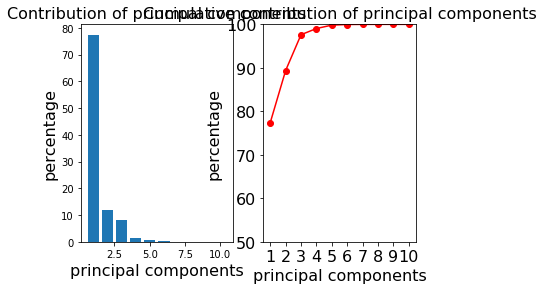

In [60]:
x = np.arange(1,len(percentage)+1,1)

plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribution of principal components',fontsize = 16)
plt.xlabel('principal components',fontsize = 16)
plt.ylabel('percentage',fontsize = 16)
# plt.xlim([0, num_pc+1])

plt.subplot(1, 2, 2)
plt.plot(x, percentage_cum*100,'ro-')
plt.xlabel('principal components',fontsize = 16)
plt.ylabel('percentage',fontsize = 16)
plt.title('Cumulative contribution of principal components',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
# plt.xlim([1, num_pc])
plt.ylim([50,100])

plt.show()

In [62]:
factor_exposures = pd.DataFrame(
                                columns=test.columns,
                                data = pca.components_).T

In [63]:
factor_exposures

,0,1,2,3,4,5,6,7,8,9
VIX,-0.003030,0.005944,0.019096,0.042665,-0.246329,-0.960144,0.114741,-0.045220,0.002163,2.620580e-04
COPP,0.125598,-0.507349,0.817759,0.183848,0.154108,-0.020130,-0.010102,0.005986,-0.000168,-1.052397e-05
3M_R,0.000015,-0.000111,0.000015,-0.000148,-0.000122,0.000364,0.000356,-0.000591,-0.001647,9.999983e-01
US_TRY,-0.000204,0.000631,0.000529,0.001304,0.001416,0.004620,0.010697,-0.029307,0.999499,1.623615e-03
BIG_IX,-0.034480,0.236611,-0.022395,0.516741,0.346217,-0.012096,0.153724,-0.728746,-0.024265,-3.751716e-04
SMALL_IX,-0.038923,0.267064,-0.037292,0.576752,0.373720,-0.112624,-0.105379,0.655206,0.019420,6.594362e-04
SENTI,-0.018089,0.066452,0.081705,0.532060,-0.807446,0.228390,-0.036854,0.002032,-0.000241,-8.213382e-05
TEMP,0.001347,-0.776842,-0.558088,0.284420,0.061563,-0.018380,0.004607,-0.002947,0.000277,-2.414214e-05
RAIN,0.001969,-0.008242,0.011471,-0.003506,-0.014435,0.111195,0.974937,0.191522,-0.005307,-2.860064e-04
OIL,0.990545,0.085365,-0.103647,0.026806,-0.008358,-0.001256,0.000227,-0.000864,0.000158,-4.428609e-07


In [64]:
labels = factor_exposures.index
data = factor_exposures.values

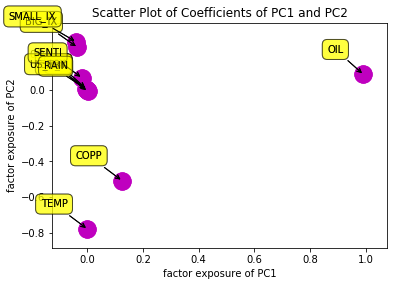

In [66]:
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o', s=300, c='m',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
plt.show()

In [73]:
from IPython.display import display, HTML

def get_PCA(df):
    X = np.asarray(df)
    pca = PCA()
    pca.fit(X)
    
    percentage = pca.explained_variance_ratio_
    percentage_cum = np.cumsum(percentage)
    pca_components = pca.components_

    x = np.arange(1,len(percentage)+1,1)

    plt.subplot(1, 2, 1)
    plt.bar(x, percentage*100, align = "center")
    plt.title('Contribution of principal components',fontsize = 16)
    plt.xlabel('principal components',fontsize = 16)
    plt.ylabel('percentage',fontsize = 16)
    # plt.xlim([0, num_pc+1])

    plt.subplot(1, 2, 2)
    plt.plot(x, percentage_cum*100,'ro-')
    plt.xlabel('principal components',fontsize = 16)
    plt.ylabel('percentage',fontsize = 16)
    plt.title('Cumulative contribution of principal components',fontsize = 16)
    plt.xticks(x,fontsize = 16) 
    plt.yticks(fontsize = 16)
    # plt.xlim([1, num_pc])
    plt.ylim([50,100])

    plt.show()

    factor_exposures = pd.DataFrame(
                                    columns=test.columns,
                                    data = pca.components_).T

    display(factor_exposures)
    labels = factor_exposures.index
    data = factor_exposures.values

    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(
        data[:, 0], data[:, 1], marker='o', s=300, c='m',
        cmap=plt.get_cmap('Spectral'))
    plt.title('Scatter Plot of Coefficients of PC1 and PC2')
    plt.xlabel('factor exposure of PC1')
    plt.ylabel('factor exposure of PC2')

    for label, x, y in zip(labels, data[:, 0], data[:, 1]):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
        )
    plt.show()

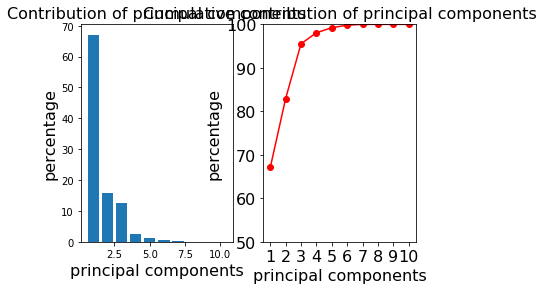

,0,1,2,3,4,5,6,7,8,9
VIX,0.002952,-0.000839,0.010390,-0.023968,-0.027399,-0.038732,0.998518,0.003853,0.002052,0.000561
COPP,-0.017565,0.007101,0.011549,-0.046499,0.996880,0.052712,0.028221,-0.000377,0.000224,0.000004
3M_R,0.000330,-0.000025,-0.000053,-0.000162,-0.000106,0.001725,0.000622,-0.000330,0.000243,-0.999998
US_TRY,-0.000041,0.000204,0.000121,0.002530,-0.000216,0.003019,-0.001889,0.001046,0.999990,0.000246
BIG_IX,0.577613,0.008098,-0.003656,0.047423,0.056194,-0.812366,-0.030502,0.001076,0.002309,-0.001243
SMALL_IX,0.815646,0.006142,-0.018137,-0.058421,-0.019088,0.574668,0.018152,-0.000796,-0.001522,0.001284
SENTI,0.020144,-0.020076,0.021090,0.995358,0.041988,0.073994,0.027621,0.000840,-0.002679,-0.000016
TEMP,0.016854,-0.021094,0.999245,-0.021540,-0.012114,0.005604,-0.011112,0.003818,-0.000106,-0.000041
RAIN,-0.000076,0.000562,-0.003869,-0.000771,0.000414,0.001416,-0.003768,0.999983,-0.001055,-0.000330
OIL,-0.008804,0.999498,0.021583,0.019823,-0.006856,0.004246,0.001097,-0.000463,-0.000269,-0.000023


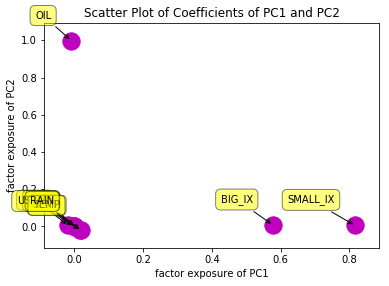

In [74]:
get_PCA(factor_df.drop('timestep', axis = 1))